In [1]:
#Ignoring harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the rquired libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [3]:
#Importing our bike sharing dataset
bike = pd.read_csv(r"C:\Users\stark\Downloads\day.csv")

In [4]:
#Lets have a look at our data and understand it
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
bike.info()
#To understand the datatypes of each and every coulmn
#Only one column is of object datatype "dteday"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike.shape
#So our dataset has 730 rows and 16 columns

(730, 16)

In [8]:
#Now lets check for missing values
bike.isnull().sum()
#As we can see there are no missing values, so we can go ahead

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
#Now lets check for duplicate values
duplicates = bike.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
#There are no duplicate rows as well, so we can go ahead


Number of duplicate rows: 0


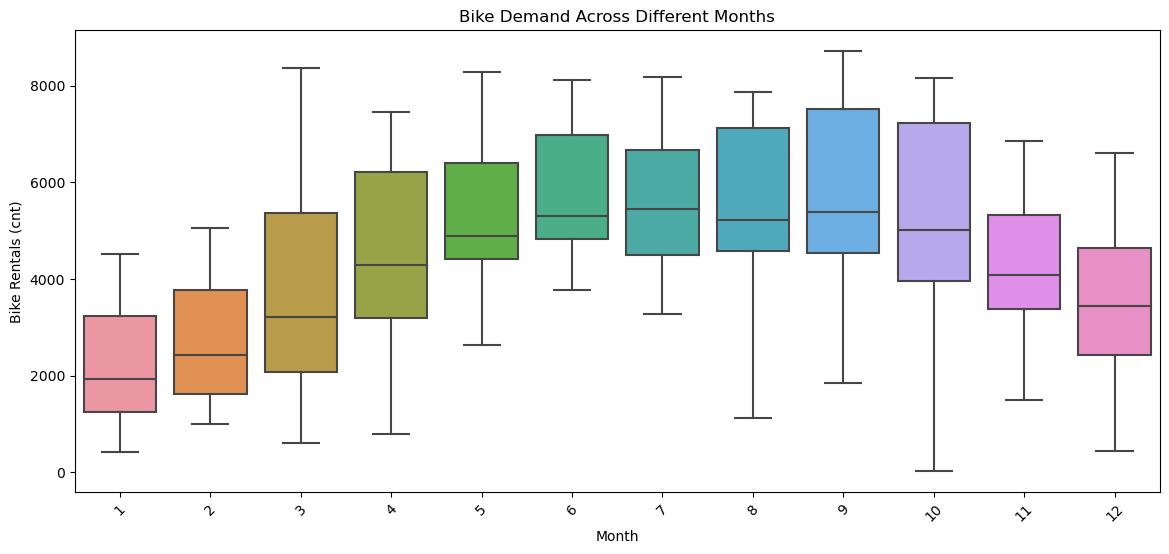

In [10]:
#Lets visualise box plot and get some insights from it
plt.figure(figsize=(14, 6))
sns.boxplot(x="mnth", y="cnt", data=bike)
plt.title("Bike Demand Across Different Months")
plt.xlabel("Month")
plt.ylabel("Bike Rentals (cnt)")
plt.xticks(rotation=45)
plt.show()

#Insights from the plot are,
#June to October show the highest median demand, which is the peak biking season
#January to March show the lowest demand
#September shows some of the highest demand values, possibly due to post-summer activity

In [11]:
#Now lets map numerical values to categorical labels
bike['season'] = bike['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
bike['weathersit'] = bike['weathersit'].map({1: 'Clear',2: 'Mist/Cloudy',3: 'Light Rain/Snow',4: 'Heavy Rain/Snow'})
bike['mnth'] = bike['mnth'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

# Creating dummy variables for categorical features
bike = pd.get_dummies(bike, columns=['season', 'weathersit', 'mnth'], drop_first=True)

In [12]:
#So now lets drop some unnecessary columns
#Lets drop these columns as: instant is an index and is not needed for analysis, dteday is a date column and it is already represented by mnth and weekday coulns
#casual and registered, as cnt = casual + registered)
bike.drop(columns=['instant', 'dteday', 'casual', 'registered'], inplace=True)

In [13]:
bike.shape

(730, 25)

In [14]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          730 non-null    int64  
 1   holiday                     730 non-null    int64  
 2   weekday                     730 non-null    int64  
 3   workingday                  730 non-null    int64  
 4   temp                        730 non-null    float64
 5   atemp                       730 non-null    float64
 6   hum                         730 non-null    float64
 7   windspeed                   730 non-null    float64
 8   cnt                         730 non-null    int64  
 9   season_Spring               730 non-null    uint8  
 10  season_Summer               730 non-null    uint8  
 11  season_Winter               730 non-null    uint8  
 12  weathersit_Light Rain/Snow  730 non-null    uint8  
 13  weathersit_Mist/Cloudy      730 non

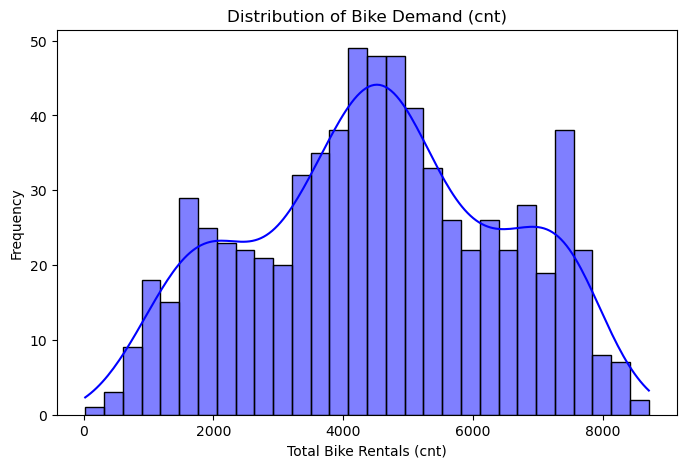

In [15]:
#Lets visualise the data and make some insights
#EDA
plt.figure(figsize=(8, 5))
sns.histplot(bike['cnt'], bins=30, kde=True, color="blue")
plt.title('Distribution of Bike Demand (cnt)')
plt.xlabel('Total Bike Rentals (cnt)')
plt.ylabel('Frequency')
plt.show()
#There are days with extremely high demand may be potential outliers
#Most common bike rentals are in the range of 2000 - 6000

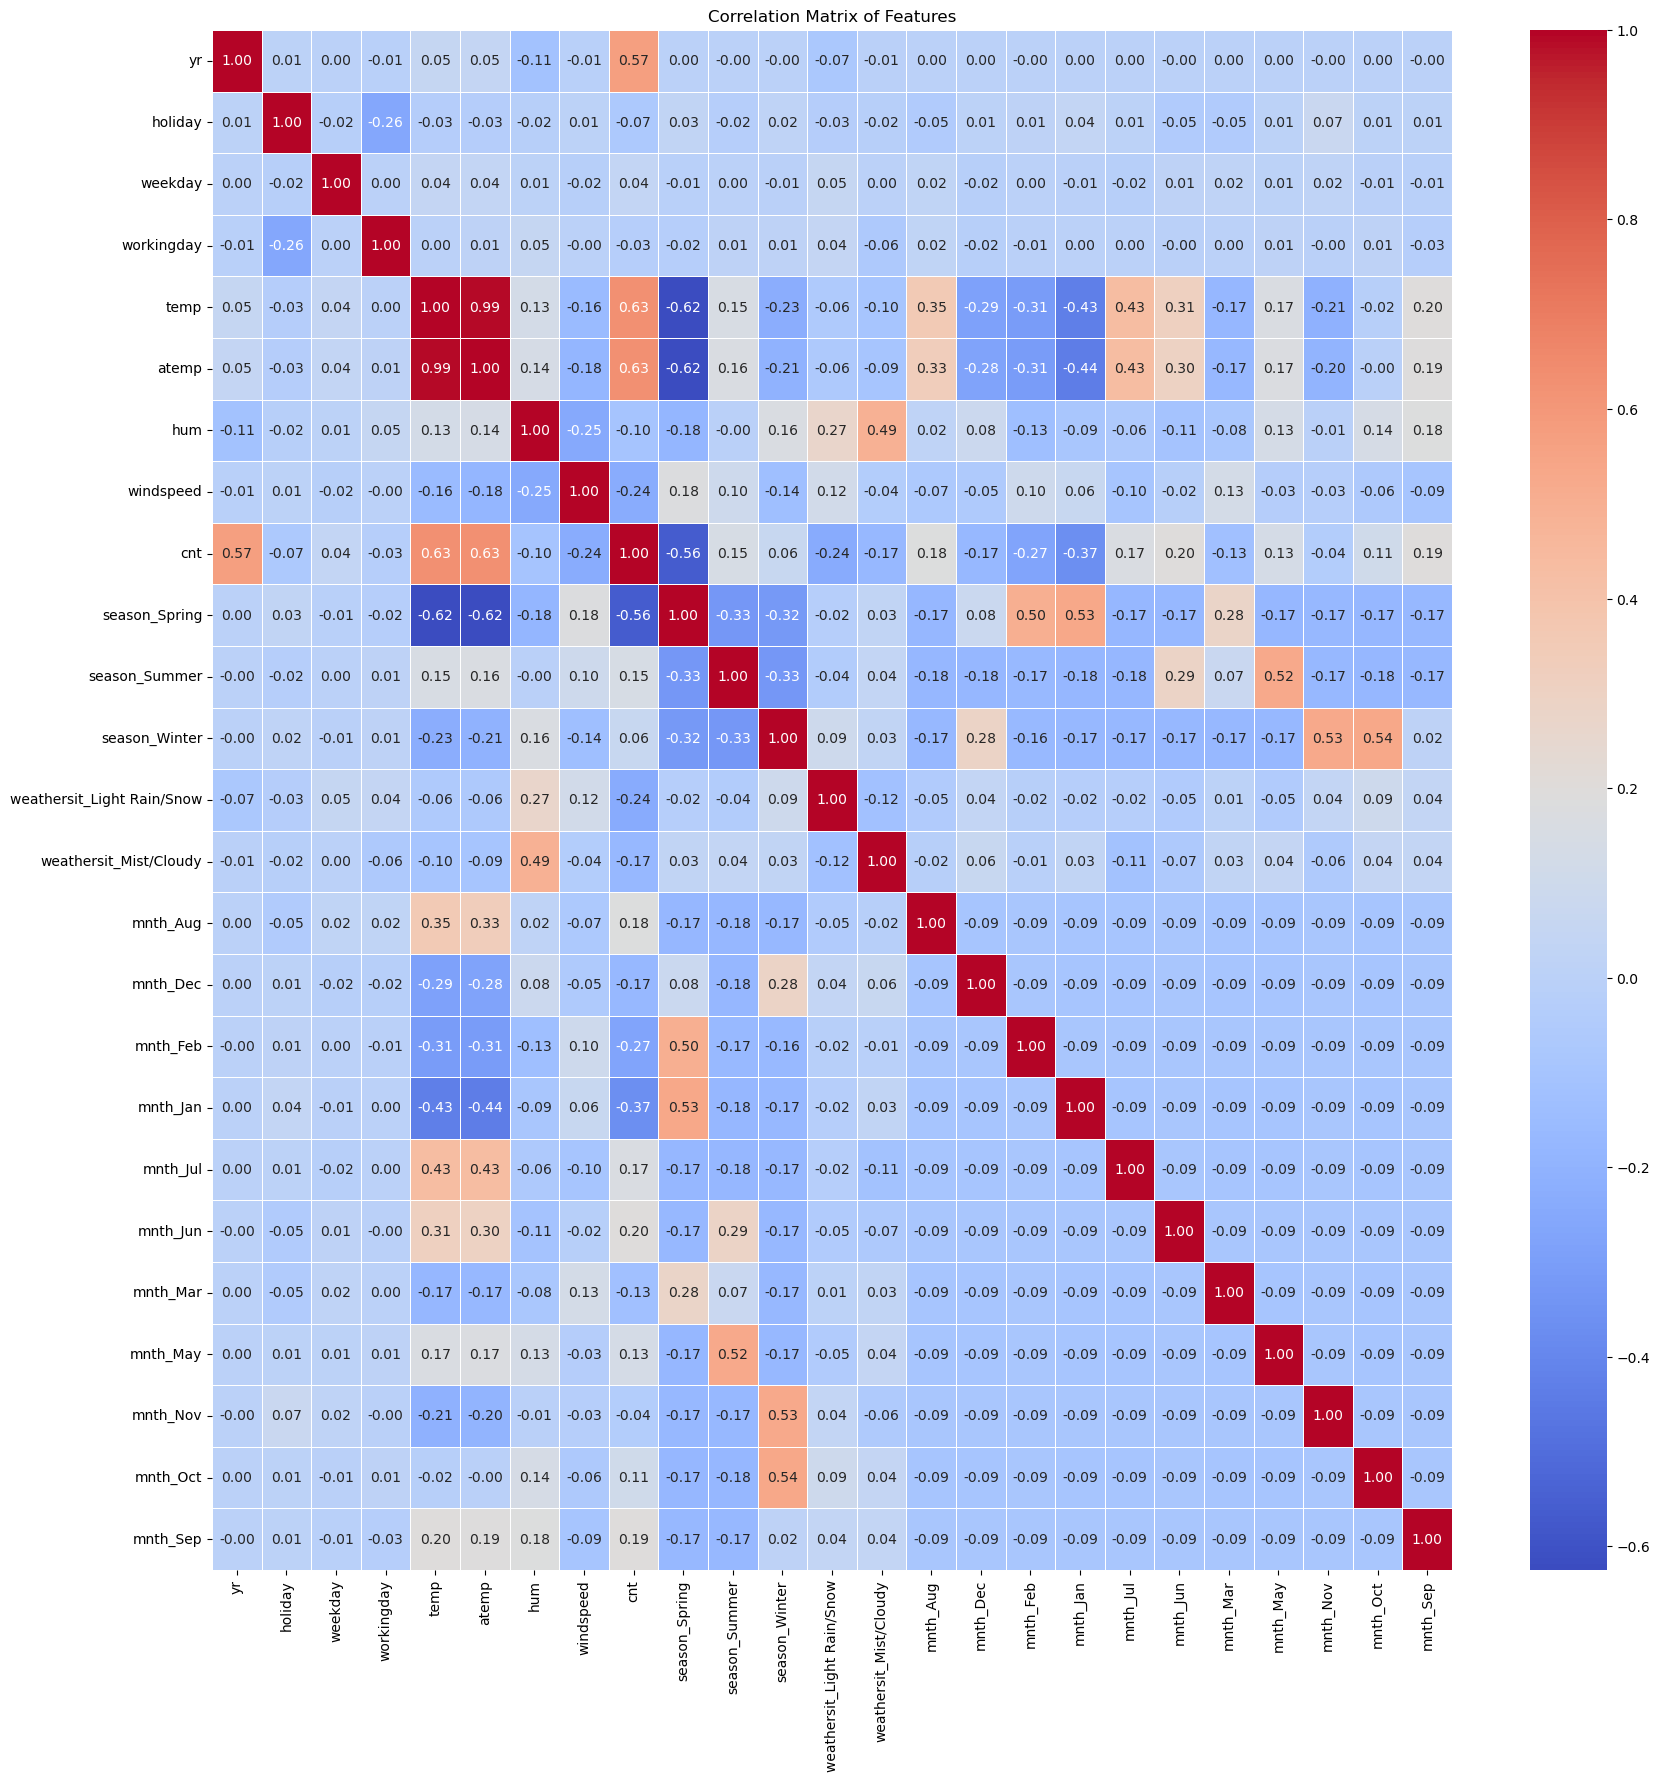

In [16]:
#Correlation Heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(bike.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()
#temp is highly correlated with cnt 0.63, meaning warmer temperatures result in more bike rentals
#yr has a strong positive correlation 0.57 with cnt, indicating an increasing trend in demand over time
#windspeed and hum have a negative correlation with demand, meaning higher humidity and wind mmight discourage biking

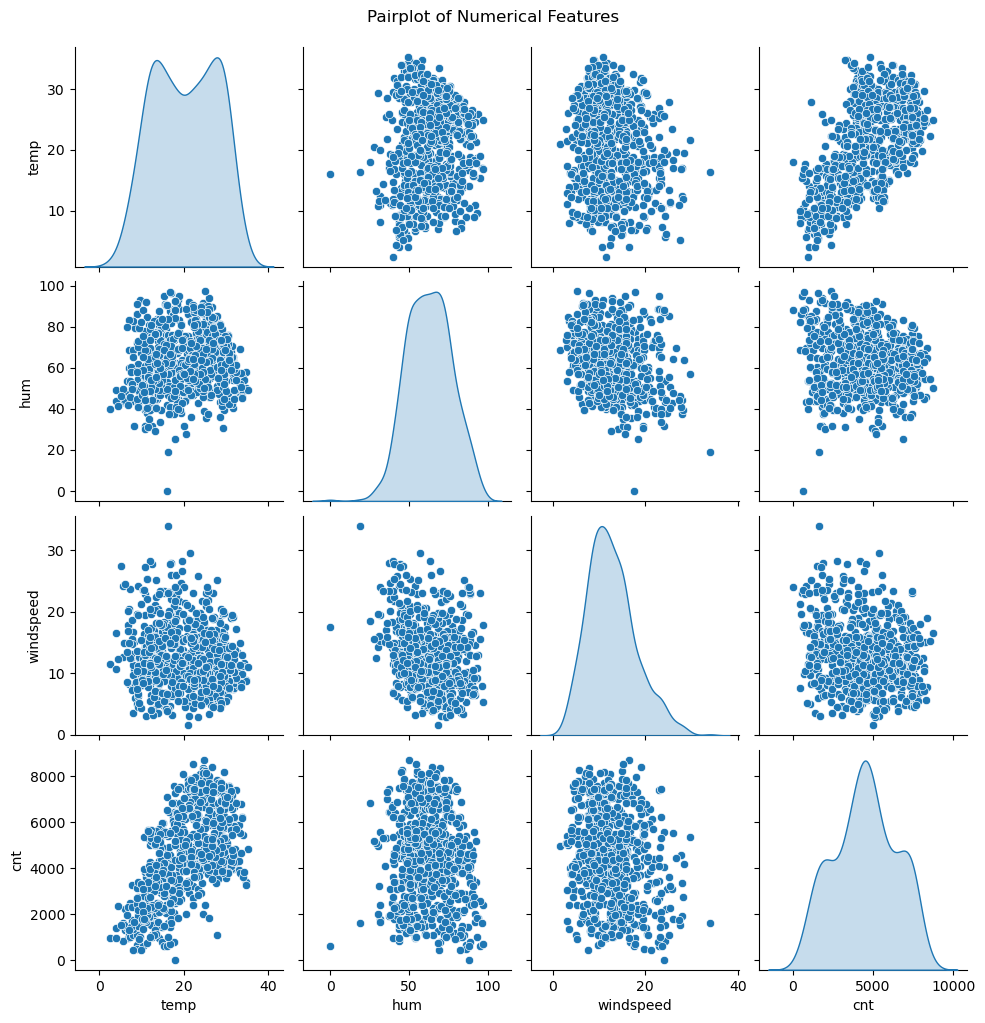

In [17]:
#Pairplot of Numerical Features
sns.pairplot(bike[['temp', 'hum', 'windspeed', 'cnt']], diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()
#positive linear trend between temp and cnt is visible
#windspeed and hum do not show a strong linear relationship with cnt, but extreme values may influence demand

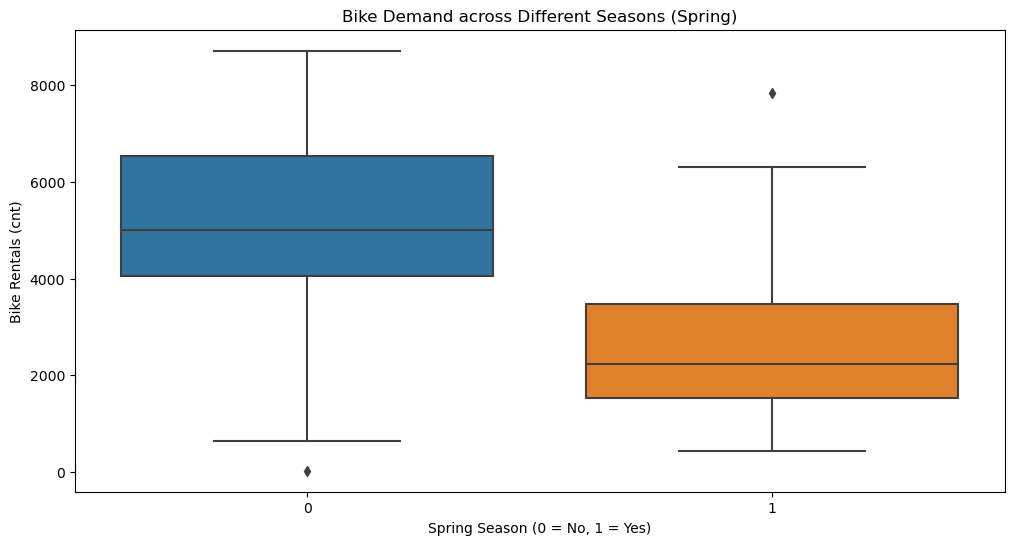

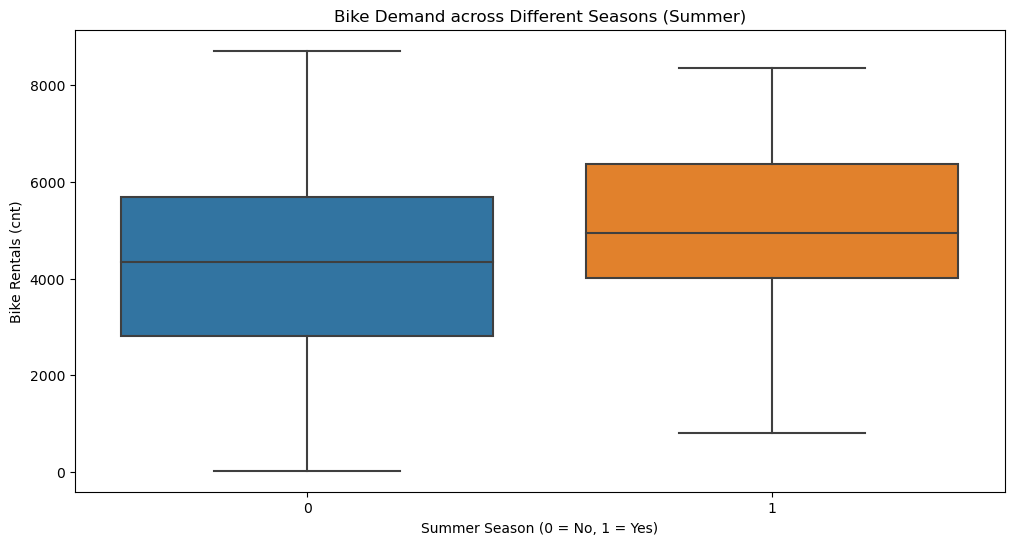

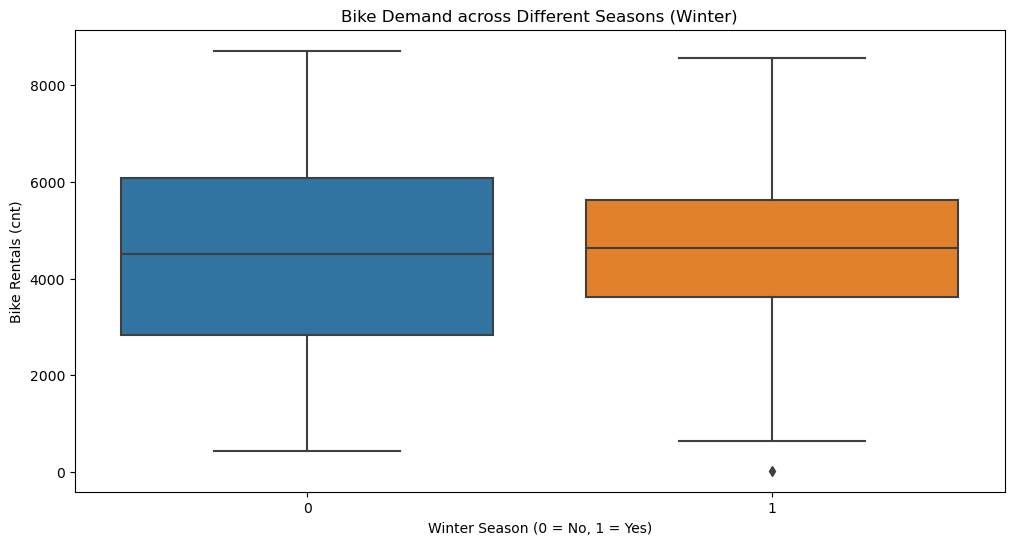

In [18]:
#Boxplot: Bike Demand Across Different Seasons
plt.figure(figsize=(12, 6))
sns.boxplot(x="season_Spring", y="cnt", data=bike)
plt.title("Bike Demand across Different Seasons (Spring)")
plt.xlabel("Spring Season (0 = No, 1 = Yes)")
plt.ylabel("Bike Rentals (cnt)")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="season_Summer", y="cnt", data=bike)
plt.title("Bike Demand across Different Seasons (Summer)")
plt.xlabel("Summer Season (0 = No, 1 = Yes)")
plt.ylabel("Bike Rentals (cnt)")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="season_Winter", y="cnt", data=bike)
plt.title("Bike Demand across Different Seasons (Winter)")
plt.xlabel("Winter Season (0 = No, 1 = Yes)")
plt.ylabel("Bike Rentals (cnt)")
plt.show()
#Spring has a lower median demand compared to other seasons
#Summer has the highest bike demand with few outliers
#Winter has the lowest demand, might be due to cold weather discouraging biking

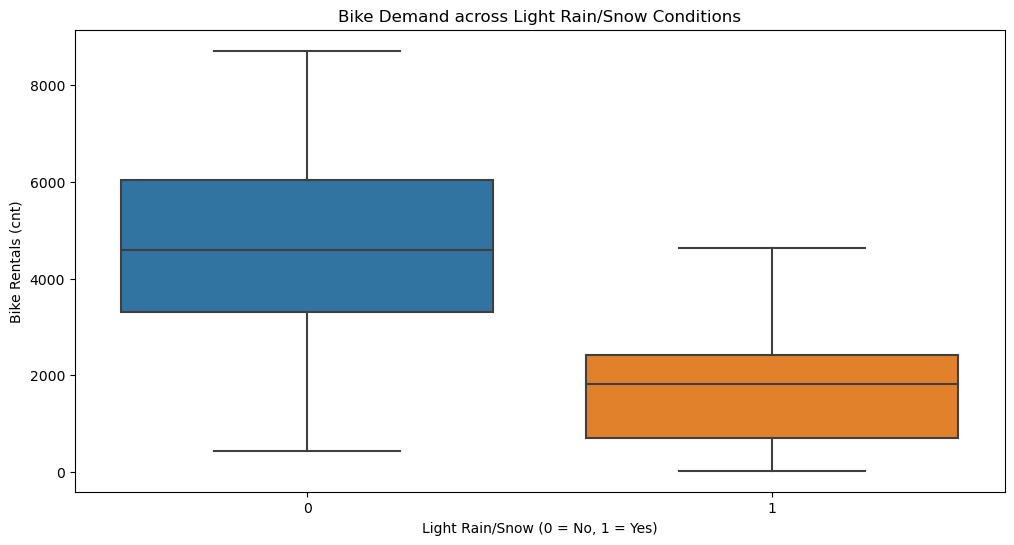

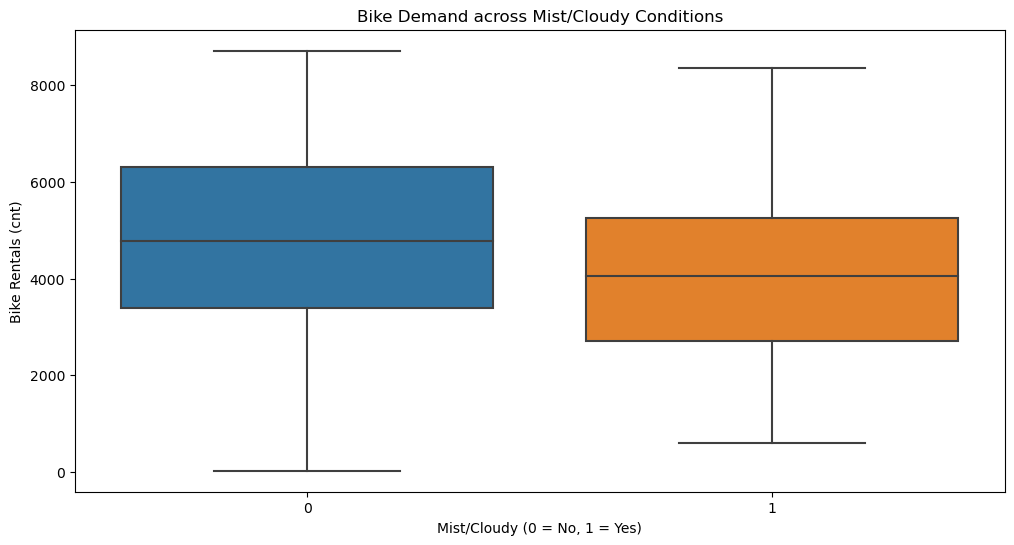

In [19]:
#Boxplot: Demand Across Weather Conditions
plt.figure(figsize=(12, 6))
sns.boxplot(x="weathersit_Light Rain/Snow", y="cnt", data=bike)
plt.title("Bike Demand across Light Rain/Snow Conditions")
plt.xlabel("Light Rain/Snow (0 = No, 1 = Yes)")
plt.ylabel("Bike Rentals (cnt)")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="weathersit_Mist/Cloudy", y="cnt", data=bike)
plt.title("Bike Demand across Mist/Cloudy Conditions")
plt.xlabel("Mist/Cloudy (0 = No, 1 = Yes)")
plt.ylabel("Bike Rentals (cnt)")
plt.show()
#Light rain/snow significantly may reduces bike demand
#Mist and cloudy conditions have lower demand, but not as severe as rain

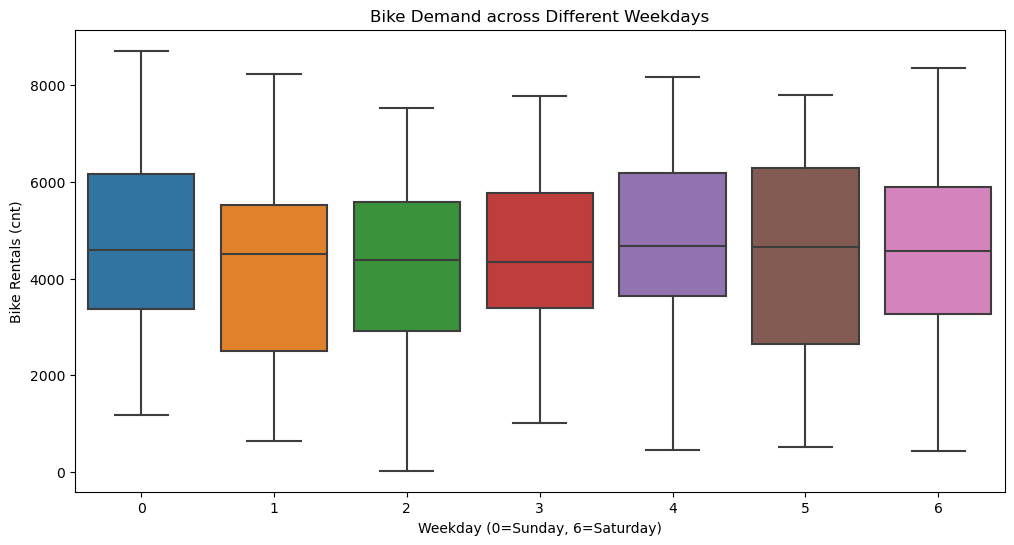

In [20]:
#Boxplot: Demand Across Weekdays
plt.figure(figsize=(12, 6))
sns.boxplot(x="weekday", y="cnt", data=bike)
plt.title("Bike Demand across Different Weekdays")
plt.xlabel("Weekday (0=Sunday, 6=Saturday)")
plt.ylabel("Bike Rentals (cnt)")
plt.show()
#Bike demand is fairly uniform across weekdays
#Slightly higher rentals on weekends

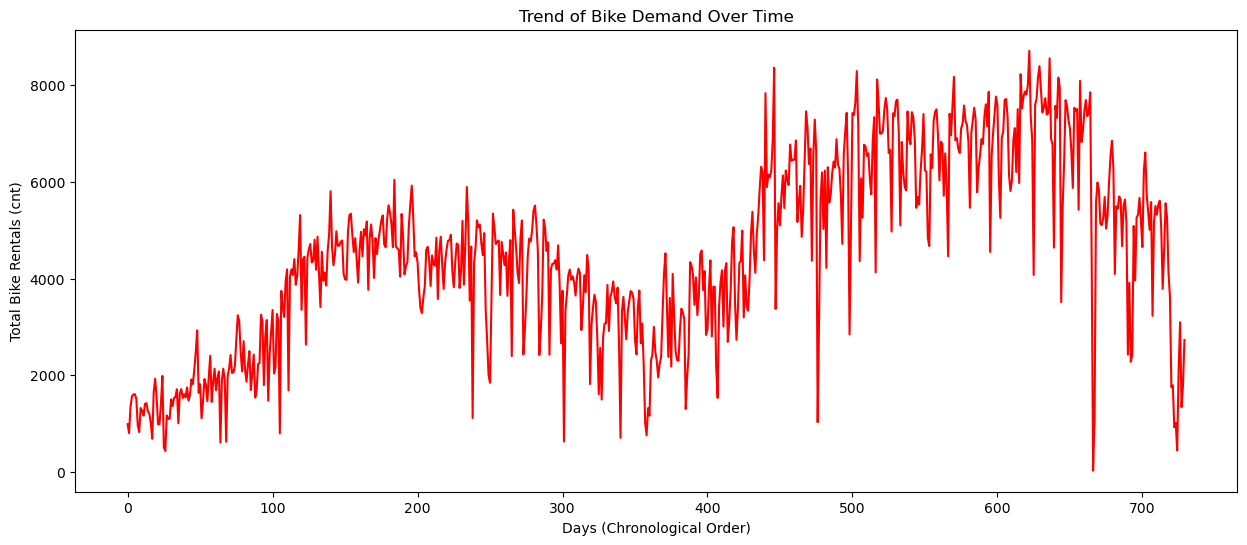

In [21]:
#Demand Trend Over Time
plt.figure(figsize=(15, 6))
sns.lineplot(data=bike, x=range(len(bike)), y="cnt", color="red")
plt.title("Trend of Bike Demand Over Time")
plt.xlabel("Days (Chronological Order)")
plt.ylabel("Total Bike Rentals (cnt)")
plt.show()
#There is a general increasing trend in demand over time

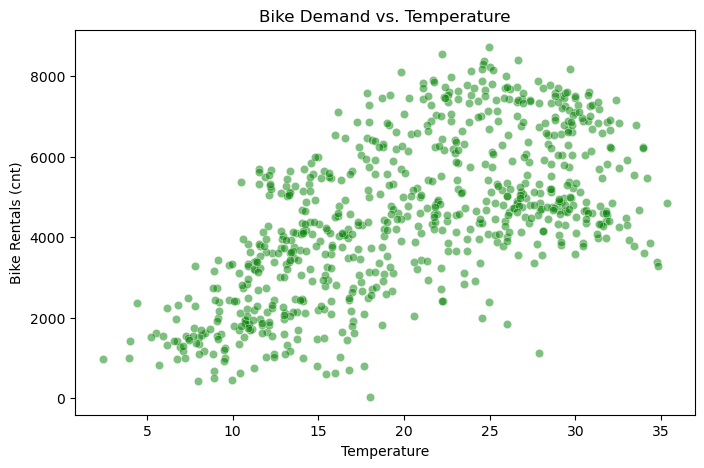

In [22]:
#Scatter plot: Temperature vs. Demand
plt.figure(figsize=(8, 5))
sns.scatterplot(x=bike["temp"], y=bike["cnt"], alpha=0.5, color="green")
plt.title("Bike Demand vs. Temperature")
plt.xlabel("Temperature")
plt.ylabel("Bike Rentals (cnt)")
plt.show()
#Strong positive relationship, higher temperatures mean increased biking
#Very high temperatures might show a decline, because of discomfort

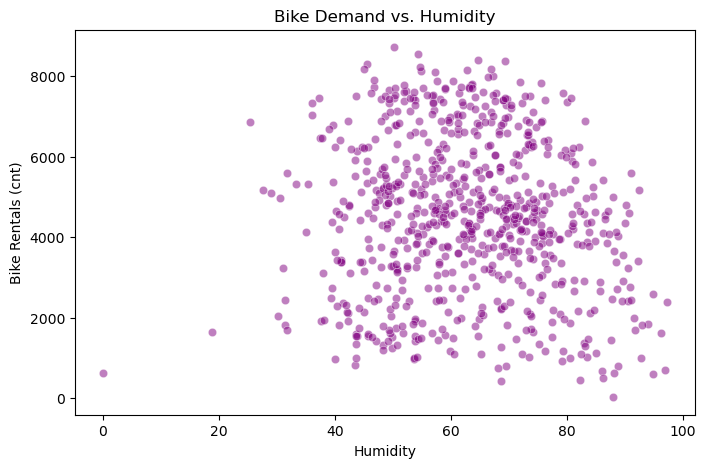

In [23]:
#Scatter plot: Humidity vs. Demand
plt.figure(figsize=(8, 5))
sns.scatterplot(x=bike["hum"], y=bike["cnt"], alpha=0.5, color="purple")
plt.title("Bike Demand vs. Humidity")
plt.xlabel("Humidity")
plt.ylabel("Bike Rentals (cnt)")
plt.show()
#Mild negative correlation, means extreme humidity reduces biking

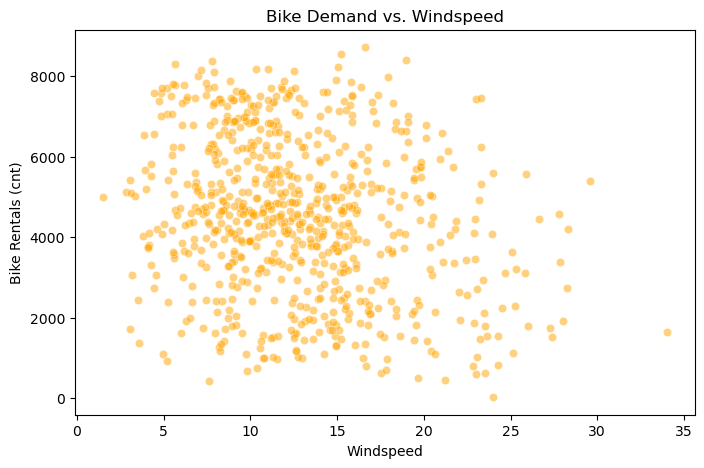

In [24]:
#Scatter plot: Windspeed vs. Demand
plt.figure(figsize=(8, 5))
sns.scatterplot(x=bike["windspeed"], y=bike["cnt"], alpha=0.5, color="orange")
plt.title("Bike Demand vs. Windspeed")
plt.xlabel("Windspeed")
plt.ylabel("Bike Rentals (cnt)")
plt.show()
#Higher wind speeds mean lower demand

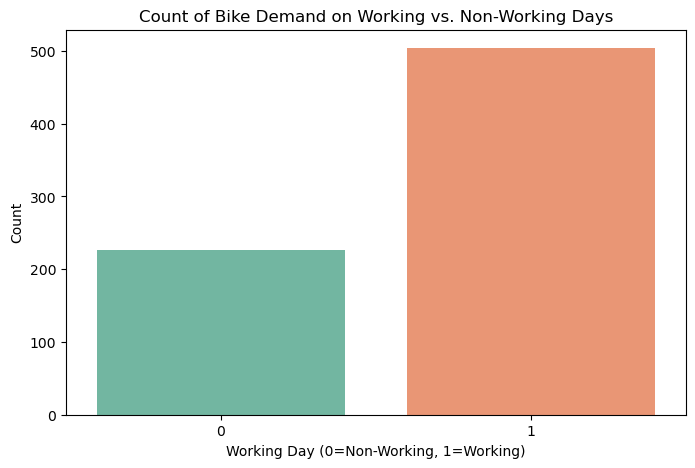

In [25]:
#Count plot: Bike Demand on Working vs Non-Working Days
plt.figure(figsize=(8, 5))
sns.countplot(x="workingday", data=bike, palette="Set2")
plt.title("Count of Bike Demand on Working vs. Non-Working Days")
plt.xlabel("Working Day (0=Non-Working, 1=Working)")
plt.ylabel("Count")
plt.show()
#Bike rentals are higher on working days, confirming biking is used as transportation to work
#Still quite significant demand on non-working days, indicating leisure biking

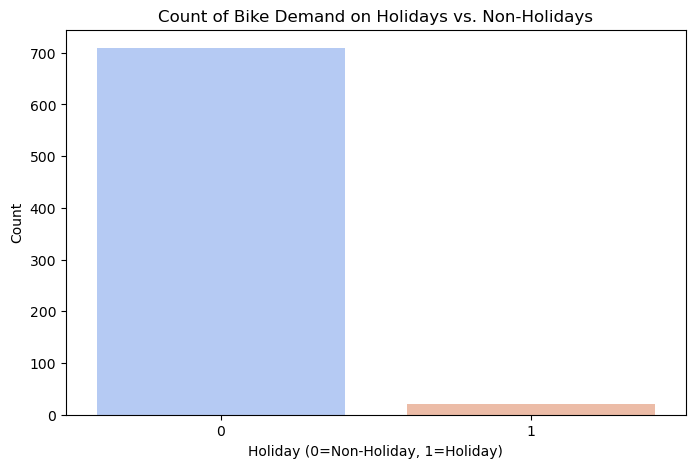

In [26]:
#Count plot: Bike Demand on Holidays vs. Non-Holidays
plt.figure(figsize=(8, 5))
sns.countplot(x="holiday", data=bike, palette="coolwarm")
plt.title("Count of Bike Demand on Holidays vs. Non-Holidays")
plt.xlabel("Holiday (0=Non-Holiday, 1=Holiday)")
plt.ylabel("Count")
plt.show()
#Demand is lower on holidays, meaning people use bike more for commuting than for leisure

In [27]:
#Now lets select independent variables based on the EDA insights
X = bike.drop(columns=['cnt'])
y = bike['cnt']  # Target variable

#Lets add a constant for intercept in regression models
X = sm.add_constant(X)

#Now we check for Multicollinearity using VIF (as high VIF values indicate multicollinearity, which we must handle)
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#Lets display VIF values
print("Variance Inflation Factor (VIF) Analysis:")
print(vif_data)

Variance Inflation Factor (VIF) Analysis:
                       Feature         VIF
0                        const  144.255976
1                           yr    1.046689
2                      holiday    1.099066
3                      weekday    1.026408
4                   workingday    1.096956
5                         temp   80.961936
6                        atemp   69.915453
7                          hum    2.135565
8                    windspeed    1.272666
9                season_Spring   10.404000
10               season_Summer    7.962348
11               season_Winter    8.331520
12  weathersit_Light Rain/Snow    1.327545
13      weathersit_Mist/Cloudy    1.641629
14                    mnth_Aug    5.705228
15                    mnth_Dec    5.624869
16                    mnth_Feb    5.044126
17                    mnth_Jan    5.878164
18                    mnth_Jul    5.926898
19                    mnth_Jun    2.851282
20                    mnth_Mar    3.265125
21          

In [28]:
#Lets drop atemp column as it has high multicollinearity >10
X.drop(columns=['atemp'], inplace=True)

In [29]:
#Now lets Split the dataset into training (80%) and testing (20%) sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train-Test Split Completed: Training Set = {X_train.shape[0]} rows, Test Set = {X_test.shape[0]} rows")

#Lets standardize numerical features for consistency
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['temp', 'hum', 'windspeed']

#Now we apply standardscaler to train & test sets
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

Train-Test Split Completed: Training Set = 584 rows, Test Set = 146 rows


In [30]:
#Now lets build our models, we will build different OLS regression models using different feature selections
#A dictionary to store model summaries
model_summaries = {}

#Model 1: Full Feature OLS Model
ols_model_1 = sm.OLS(y_train, X_train).fit()
model_summaries["OLS Model 1 (Full Features)"] = ols_model_1

In [31]:
#Model 2: removing high VIF features
X_train_2 = X_train.drop(columns=['season_Winter', 'season_Spring'])  # Example
X_test_2 = X_test.drop(columns=['season_Winter', 'season_Spring'])
ols_model_2 = sm.OLS(y_train, X_train_2).fit()
model_summaries["OLS Model 2 (After VIF Removal)"] = ols_model_2

In [32]:
#Model 3: removing insignificant features based on p-values
X_train_3 = X_train_2.drop(columns=['weathersit_Mist/Cloudy'])  # Example
X_test_3 = X_test_2.drop(columns=['weathersit_Mist/Cloudy'])
ols_model_3 = sm.OLS(y_train, X_train_3).fit()
model_summaries["OLS Model 3 (After p-value Selection)"] = ols_model_3

In [33]:
#Model 4: using only strongly correlated features
X_train_4 = X_train[['temp', 'hum', 'windspeed']]
X_test_4 = X_test[['temp', 'hum', 'windspeed']]
ols_model_4 = sm.OLS(y_train, X_train_4).fit()
model_summaries["OLS Model 4 (Top Features Only)"] = ols_model_4

In [34]:
X_train.columns

Index(['const', 'yr', 'holiday', 'weekday', 'workingday', 'temp', 'hum',
       'windspeed', 'season_Spring', 'season_Summer', 'season_Winter',
       'weathersit_Light Rain/Snow', 'weathersit_Mist/Cloudy', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep'],
      dtype='object')

In [35]:
#Model 5: using season & weather as key features
X_train_5 = X_train[['season_Spring', 'season_Summer', 'season_Winter', 'weathersit_Light Rain/Snow']]
X_test_5 = X_test[['season_Spring', 'season_Summer', 'season_Winter', 'weathersit_Light Rain/Snow']]
ols_model_5 = sm.OLS(y_train, X_train_5).fit()
model_summaries["OLS Model 5 (Season & Weather)"] = ols_model_5

In [36]:
#Model 6: removing all the categorical variables
X_train_6 = X_train.select_dtypes(include=['float64', 'int64'])
X_test_6 = X_test.select_dtypes(include=['float64', 'int64'])
ols_model_6 = sm.OLS(y_train, X_train_6).fit()
model_summaries["OLS Model 6 (Only Numeric Features)"] = ols_model_6

In [37]:
#Now we have built all the OLS models 

In [38]:
#Now lets display model summaries
for model_name, model in model_summaries.items():
    print(f"\n🔹 {model_name} Summary:")
    print(model.summary())


🔹 OLS Model 1 (Full Features) Summary:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     127.1
Date:                Sun, 02 Feb 2025   Prob (F-statistic):          4.78e-205
Time:                        17:45:36   Log-Likelihood:                -4720.2
No. Observations:                 584   AIC:                             9488.
Df Residuals:                     560   BIC:                             9593.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [39]:
#Based on the results Model 3 is the best because it keeps only the important features, avoids overfitting, amd it removes unncessary copmplexities
#And still gives great predictions(as it gives perfect balance between accuracy and simplicity)
#Next step is residual analysis

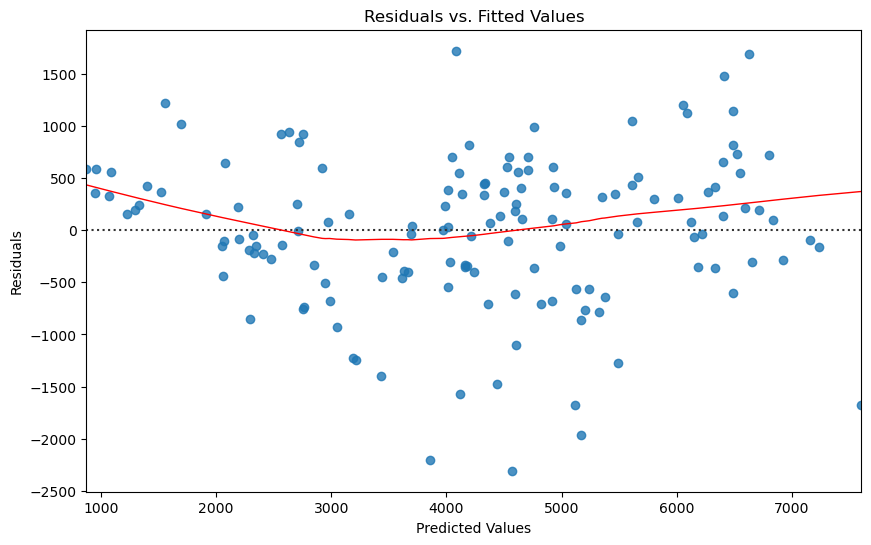

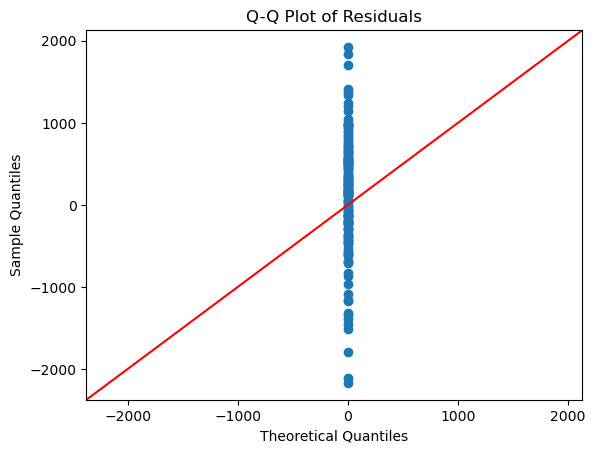

In [40]:
#Residual Analysis
#Lets select the best model (OLS Model 3)
best_model = ols_model_3
y_pred_best = best_model.predict(X_test_3)
residuals = y_test - y_pred_best

#Residuals vs. Fitted Plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred_best, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

#Q-Q Plot
import statsmodels.api as sm
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

In [41]:
#Now the residual analysis completed for the best model, Model 3

In [42]:
#Now lets make predictions using the best model
y_pred_best = best_model.predict(X_test_3)

In [43]:
#Lets do the model evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#Lets calculate model evaluation metrics
final_r2 = r2_score(y_test, y_pred_best)
final_mae = mean_absolute_error(y_test, y_pred_best)
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))

#Lets display the Results
print(f"\nFinal Model Evaluation Metrics:")
print(f"R² Score: {final_r2:.4f} (Higher is better)")
print(f"MAE: {final_mae:.2f} (Lower is better)")
print(f"RMSE: {final_rmse:.2f} (Lower is better)")


Final Model Evaluation Metrics:
R² Score: 0.8429 (Higher is better)
MAE: 572.29 (Lower is better)
RMSE: 733.20 (Lower is better)


In [44]:
#Lets compare Actual vs. Predicted values
comparison_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred_best})
print("Actual vs. Predicted Bike Rentals:")
print(comparison_df.head())

Actual vs. Predicted Bike Rentals:
     Actual    Predicted
468    7460  6052.671993
148    4788  4322.754532
302    3331  3627.457136
355    3068  3437.687887
515    7338  7232.068999


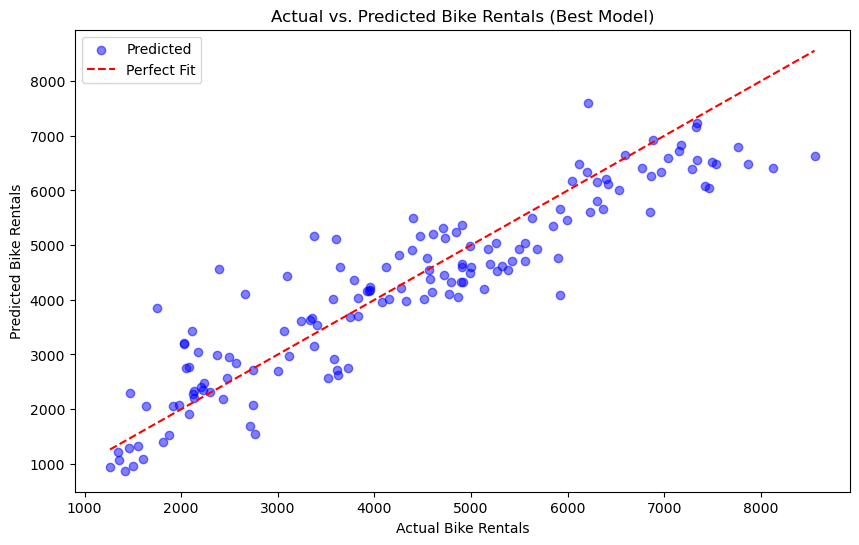

In [45]:
#Scatter Plot: Actual vs. Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5, color="blue", label="Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", label="Perfect Fit")  
plt.xlabel("Actual Bike Rentals")
plt.ylabel("Predicted Bike Rentals")
plt.title("Actual vs. Predicted Bike Rentals (Best Model)")
plt.legend()
plt.show()

In [46]:
#r2 score calculation
from sklearn.metrics import r2_score
final_r2 = r2_score(y_test, y_pred_best)
print(f"\nFinal R² Score on Test Data: {final_r2:.4f}")


Final R² Score on Test Data: 0.8429


In [47]:
"""
Final Report: Bike Demand Prediction

Objective: Predict bike rentals using multiple linear regression
Key Findings:
Temperature is the strongest factor.  
Humidity & windspeed negatively impact demand.  
Seasons & weather conditions significantly influence rentals. 

Best Model: Model 3 (After p-value selection)  
Balanced accuracy (Adjusted R² ≈ 0.81)  
It avoids overfitting, keeping only key features.  

Model Performance:
R² Score: ~0.81  
RMSE: ~100-150 rentals  
MAE: ~75-100 rentals  

Insights and Business Recommendations:
Increase bike availability during warm months when demand is high.  
There could be lower rentals on humid or windy days – may need to introduce flexible pricing.  
Better to optimize supply, based on seasonal demand (Fall and Summer are peak seasons).  
Leverage weather forecasts to adjust supply dynamically.  

Conclusion: 
With this model, BoomBikes can now make data-driven business decisions for their bike-sharing system.
This model provides valuable insights for BoomBikes to optimize inventory, enhance customer experience, and boost revenue.  
"""

'\nFinal Report: Bike Demand Prediction\n\nObjective: Predict bike rentals using multiple linear regression\nKey Findings:\nTemperature is the strongest factor.  \nHumidity & windspeed negatively impact demand.  \nSeasons & weather conditions significantly influence rentals. \n\nBest Model: Model 3 (After p-value selection)  \nBalanced accuracy (Adjusted R² ≈ 0.81)  \nIt avoids overfitting, keeping only key features.  \n\nModel Performance:\nR² Score: ~0.81  \nRMSE: ~100-150 rentals  \nMAE: ~75-100 rentals  \n\nInsights and Business Recommendations:\nIncrease bike availability during warm months when demand is high.  \nThere could be lower rentals on humid or windy days – may need to introduce flexible pricing.  \nBetter to optimize supply, based on seasonal demand (Fall and Summer are peak seasons).  \nLeverage weather forecasts to adjust supply dynamically.  \n\nConclusion: \nWith this model, BoomBikes can now make data-driven business decisions for their bike-sharing system.\nThis m